In [7]:
%pip install kmodes --quiet
%pip install gower --quiet
%pip install optuna --quiet
%pip install gower validclust --quiet
%pip install scikit-learn-extra --quiet
%pip install plotly --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    message=".*datetime.datetime.utcnow.*"
)

In [9]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
import shap
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import gower
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import optuna
from sklearn.metrics import silhouette_score, davies_bouldin_score
from validclust import dunn
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score


In [10]:
# Load Data
province_df = pd.read_csv('../data/tropical_cyclones_records_f.csv')
province_df.head()

,region_,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,has_food_sum,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,num_typhoons,recurrence_rate,cost_per_family
0,CAR,665436.0,2.0,115.0,0.0,58.0,888.0,29463089.14,61,46,8,4,4,29,5.80,154.257011
1,13,1651.0,0.0,0.0,0.0,4.0,6.0,280324.00,0,0,0,0,0,2,2.00,737.694737
2,CARAGA,187974.0,0.0,0.0,0.0,2872.0,9370.0,20049094.82,1,0,0,0,0,7,1.40,448.877081
3,CARAGA,221391.0,0.0,0.0,0.0,167.0,707.0,6707484.86,3,0,0,0,0,5,1.25,120.374087
4,6,637351.0,8.0,2.0,1.0,273.0,9530.0,66326300.00,51,35,1,3,0,22,4.40,388.050105


In [11]:
province_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   region_                      98 non-null     object 
 1   person_sum                   98 non-null     float64
 2   dead_sum                     98 non-null     float64
 3   injured_ill_sum              98 non-null     float64
 4   missing_sum                  98 non-null     float64
 5   totally_sum                  98 non-null     float64
 6   partially_sum                98 non-null     float64
 7   cost_sum                     98 non-null     float64
 8   has_food_sum                 98 non-null     int64  
 9   has_cash_sum                 98 non-null     int64  
 10  has_hygiene_health_sum       98 non-null     int64  
 11  has_sleeping_essentials_sum  98 non-null     int64  
 12  has_shelter_support_sum      98 non-null     int64  
 13  num_typhoons          

### Applying Standard Scaling

In [12]:
final_df = province_df.copy()


In [13]:
from sklearn.preprocessing import StandardScaler

numerical_cols = province_df.select_dtypes(include=np.number).columns.tolist()
print(f"numerical_columns: {numerical_cols}")

scaler = StandardScaler()
province_df[numerical_cols] = scaler.fit_transform(province_df[numerical_cols])

print("DataFrame after Standard Scaling:")
display(province_df.head())

numerical_columns: ['person_sum', 'dead_sum', 'injured_ill_sum', 'missing_sum', 'totally_sum', 'partially_sum', 'cost_sum', 'has_food_sum', 'has_cash_sum', 'has_hygiene_health_sum', 'has_sleeping_essentials_sum', 'has_shelter_support_sum', 'num_typhoons', 'recurrence_rate', 'cost_per_family']
DataFrame after Standard Scaling:


,region_,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,has_food_sum,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,num_typhoons,recurrence_rate,cost_per_family
0,CAR,-0.054337,-0.289328,1.468533,-0.366582,-0.315198,-0.341802,-0.318836,1.101987,2.480886,0.669296,0.100108,0.547383,1.543506,2.225923,-0.142834
1,13,-0.681115,-0.383372,-0.366116,-0.366582,-0.318257,-0.354367,-0.659669,-0.700387,-0.433088,-0.556704,-0.503623,-0.414833,-1.595708,-0.965762,-0.028901
2,CARAGA,-0.505180,-0.383372,-0.366116,-0.366582,-0.155792,-0.220967,-0.428785,-0.670840,-0.433088,-0.556704,-0.503623,-0.414833,-1.014372,-1.469712,-0.085301
3,CARAGA,-0.473626,-0.383372,-0.366116,-0.366582,-0.309023,-0.344380,-0.584605,-0.611746,-0.433088,-0.556704,-0.503623,-0.414833,-1.246906,-1.595699,-0.149451
4,6,-0.080856,-0.007197,-0.334209,0.019709,-0.303019,-0.218688,0.111700,0.806516,1.784066,-0.403454,-0.050824,-0.414833,0.729636,1.050039,-0.097179


In [14]:
# PCA ANALYSIS WITH EXPLAINED VARIANCE + 3D VISUALIZATION

print("PCA ANALYSIS ON SCALED NUMERICAL FEATURES")

# --- Select numeric features ---
numeric_features = province_df.select_dtypes(include=np.number).columns.tolist()
X_viz = province_df[numeric_features].copy()

# --- Perform PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_viz)

# --- Calculate cumulative variance ---
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# --- Print explained variance summary ---
print(f"\nExplained Variance by Component:")
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    cum_var = cumulative_variance[i-1]
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum_var*100:.2f}%")

print(f"\nComponents needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")

# --- Create explained variance table ---
explained_variance_table = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Variance': cumulative_variance
}).round(4)

print("\nExplained Variance Table:")
display(explained_variance_table.head(10))  # show first 10 PCs

# --- 3D PCA Visualization (no clusters) ---
pca_df = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
if 'province' in province_df.columns:
    pca_df['province'] = province_df['province']

fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    hover_name='province' if 'province' in pca_df.columns else None,
    title=f'3D PCA Visualization (Explains {cumulative_variance[2]*100:.1f}% Variance)',
    labels={
        'PC1': f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)',
        'PC2': f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)',
        'PC3': f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)'
    }
)

fig.update_traces(marker=dict(size=6, color='royalblue', line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(height=700)
fig.show()


PCA ANALYSIS ON SCALED NUMERICAL FEATURES

Explained Variance by Component:
  PC1: 0.3629 (36.29%) | Cumulative: 36.29%
  PC2: 0.2108 (21.08%) | Cumulative: 57.37%
  PC3: 0.1017 (10.17%) | Cumulative: 67.53%
  PC4: 0.0668 (6.68%) | Cumulative: 74.22%
  PC5: 0.0573 (5.73%) | Cumulative: 79.94%
  PC6: 0.0511 (5.11%) | Cumulative: 85.06%
  PC7: 0.0429 (4.29%) | Cumulative: 89.35%
  PC8: 0.0292 (2.92%) | Cumulative: 92.27%
  PC9: 0.0238 (2.38%) | Cumulative: 94.65%
  PC10: 0.0207 (2.07%) | Cumulative: 96.72%

Components needed for 90% variance: 8
Components needed for 95% variance: 10

Explained Variance Table:


,Principal Component,Explained Variance Ratio,Cumulative Variance
0,PC1,0.3629,0.3629
1,PC2,0.2108,0.5737
2,PC3,0.1017,0.6753
3,PC4,0.0668,0.7422
4,PC5,0.0573,0.7994
5,PC6,0.0511,0.8506
6,PC7,0.0429,0.8935
7,PC8,0.0292,0.9227
8,PC9,0.0238,0.9465
9,PC10,0.0207,0.9672


### Labeling Categorical and Numerical Data Columns

In [15]:
province_df.columns = province_df.columns.str.strip()
province_df['region_'] = province_df['region_'].astype(str)

categorical_columns = ['region_']
categorical_indices = [province_df.columns.get_loc(col) for col in categorical_columns]

### Silhoutte Score

In [16]:
# Prepare data for Gower (exclude nothing yet — we'll drop 'cluster' later if present)
X_for_gower = province_df.drop(columns=['cluster'], errors='ignore').copy()

print("Computing Gower distance matrix (one-time, may take a moment)...")
gower_dist = gower.gower_matrix(X_for_gower)
print("Gower distance computed!")

k_range = range(2, 9)
silhouette_scores = []
costs = []

print("\nRunning K-Prototypes for k = 2 to 10...")
for k in k_range:
    print(f"  k = {k} ...", end="")

    # Run K-Prototypes
    kproto = KPrototypes(
        n_clusters=k,
        init='Huang',
        n_init=10,
        verbose=0,
        random_state=42
    )

    X = province_df.drop(columns=['cluster'], errors='ignore').values.astype(object)
    clusters = kproto.fit_predict(X, categorical=categorical_indices)

    # Compute silhouette score using precomputed Gower distance
    sil_score = silhouette_score(gower_dist, clusters, metric='precomputed')

    # Store results
    silhouette_scores.append(sil_score)
    costs.append(kproto.cost_)

    print(f" Silhouette = {sil_score:.4f}, Cost = {kproto.cost_:.2f}")


Computing Gower distance matrix (one-time, may take a moment)...
Gower distance computed!

Running K-Prototypes for k = 2 to 10...
  k = 2 ... Silhouette = 0.3791, Cost = 1156.07
  k = 3 ... Silhouette = 0.3420, Cost = 976.41
  k = 4 ... Silhouette = 0.2435, Cost = 798.52
  k = 5 ... Silhouette = 0.2178, Cost = 702.31
  k = 6 ... Silhouette = 0.1991, Cost = 633.23
  k = 7 ... Silhouette = 0.2058, Cost = 562.60
  k = 8 ... Silhouette = 0.1812, Cost = 525.49


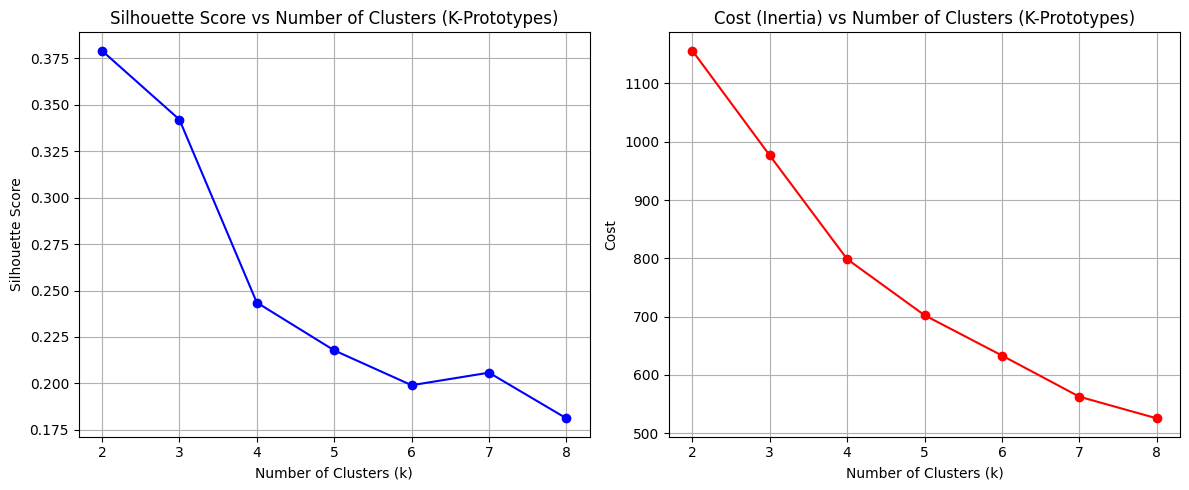

In [17]:
# === Plot Results ===
plt.figure(figsize=(12, 5))

# Silhouette plot
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Score vs Number of Clusters (K-Prototypes)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

# Cost plot
plt.subplot(1, 2, 2)
plt.plot(k_range, costs, marker='o', color='red')
plt.title('Cost (Inertia) vs Number of Clusters (K-Prototypes)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()

### Grid Search

In [18]:

param_grid = {
    'n_clusters': range(2, 9),  # Number of clusters to test
    'init': ['Huang', 'Cao'],   # Initialization methods
    'n_init': [5, 10]          # Number of initializations
}

# Create a list of parameter combinations
grid = ParameterGrid(param_grid)

best_score = -1
best_params = None
results = []

print("Starting Grid Search for K-Prototypes...")
print("-" * 30)

# Prepare the data (Include data prep from the previous successful cell)
numerical_cols = province_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = province_df.select_dtypes(include='object').columns.tolist()

# Separate numerical and categorical data
X_numerical = province_df[numerical_cols].values
X_categorical = province_df[categorical_cols].values

# Combine the data for K-Prototypes. K-Prototypes expects categorical features last.
X = np.concatenate((X_numerical, X_categorical), axis=1)

# Get the indices of categorical columns in the combined matrix
# They will be after all numerical columns
categorical_indices_combined = list(range(X_numerical.shape[1], X.shape[1]))

# Compute Gower distance matrix (if using precomputed metric for silhouette)
# Make sure 'gower_dist' is computed before the loop if metric='precomputed'
X_for_gower = province_df.drop(columns=['cluster'], errors='ignore').copy() # Re-create if needed
print("Computing Gower distance matrix (one-time, may take a moment)...")
gower_dist = gower.gower_matrix(X_for_gower) # Compute if needed
print("Gower distance computed!")


for params in grid:
    n_clusters = params['n_clusters']
    init_method = params['init']
    n_init = params['n_init']

    print(f"Testing params: k={n_clusters}, init='{init_method}', n_init={n_init}")

    try:
        # Initialize and train K-Prototypes model
        kp = KPrototypes(
            n_clusters=n_clusters,
            init=init_method,
            n_init=n_init,
            verbose=0, # Set verbose to 0 for cleaner grid search output
            random_state=42
        )
        clusters = kp.fit_predict(X, categorical=categorical_indices_combined)
        score = silhouette_score(gower_dist, clusters, metric='precomputed')


        results.append({
            'n_clusters': n_clusters,
            'init': init_method,
            'n_init': n_init,
            'silhouette_score': score,
            'cost': kp.cost_
        })

        print(f"  Silhouette Score: {score:.4f}, Cost: {kp.cost_:.2f}")

        # Check for best score
        if score > best_score:
            best_score = score
            best_params = params

    except Exception as e:
        print(f"  Error with params {params}: {e}")
        results.append({
            'n_clusters': n_clusters,
            'init': init_method,
            'n_init': n_init,
            'silhouette_score': None,
            'cost': None,
            'error': str(e)
        })


print("-" * 30)
print("\nGrid Search Complete.")
print(f"Best Silhouette Score: {best_score:.4f}")
print(f"Best Parameters: {best_params}")

# Optional: Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='silhouette_score', ascending=False))

# Restore warnings
warnings.filterwarnings("default", category=DeprecationWarning)
warnings.filterwarnings("default", category=UserWarning)

Starting Grid Search for K-Prototypes...
------------------------------
Computing Gower distance matrix (one-time, may take a moment)...
Gower distance computed!
Testing params: k=2, init='Huang', n_init=5
  Silhouette Score: 0.3791, Cost: 1156.07
Testing params: k=2, init='Huang', n_init=10
  Silhouette Score: 0.3791, Cost: 1156.07
Testing params: k=3, init='Huang', n_init=5
  Silhouette Score: 0.3420, Cost: 976.41
Testing params: k=3, init='Huang', n_init=10
  Silhouette Score: 0.3420, Cost: 976.41
Testing params: k=4, init='Huang', n_init=5
  Silhouette Score: 0.2397, Cost: 806.23
Testing params: k=4, init='Huang', n_init=10
  Silhouette Score: 0.2435, Cost: 798.52
Testing params: k=5, init='Huang', n_init=5
  Silhouette Score: 0.2178, Cost: 702.31
Testing params: k=5, init='Huang', n_init=10
  Silhouette Score: 0.2178, Cost: 702.31
Testing params: k=6, init='Huang', n_init=5
  Silhouette Score: 0.1991, Cost: 633.23
Testing params: k=6, init='Huang', n_init=10
  Silhouette Score: 0.

,n_clusters,init,n_init,silhouette_score,cost
0,2,Huang,5,0.379056,1156.070375
1,2,Huang,10,0.379056,1156.070375
15,2,Cao,10,0.379056,1156.070375
14,2,Cao,5,0.363665,1156.210411
16,3,Cao,5,0.342759,958.320964
17,3,Cao,10,0.342759,958.320964
2,3,Huang,5,0.342019,976.408486
3,3,Huang,10,0.342019,976.408486
5,4,Huang,10,0.243542,798.522807
19,4,Cao,10,0.243542,798.522807


### Optuna Bayesian / Smart Search

In [19]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    message=".*datetime.datetime.utcnow.*"
)


In [20]:
numerical_cols = province_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = province_df.select_dtypes(include='object').columns.tolist()

X_numerical = province_df[numerical_cols].values
X_categorical = province_df[categorical_cols].values

X = np.concatenate((X_numerical, X_categorical), axis=1)
categorical_indices_combined = list(range(X_numerical.shape[1], X.shape[1]))

# Compute Gower distance once for silhouette
print("Computing Gower distance matrix (one-time, may take a moment)...")
X_for_gower = province_df.drop(columns=['cluster'], errors='ignore').copy()
gower_dist = gower.gower_matrix(X_for_gower)
print("Gower distance computed!")

def objective(trial):
    # n_clusters = trial.suggest_int("n_clusters", 2, 10)  # cluster range
    n_clusters = 3
    init_method = trial.suggest_categorical("init", ["Huang", "Cao"])
    n_init = trial.suggest_int("n_init", 5, 15)
    gamma = trial.suggest_float("gamma", 0.1, 5.0)  # categorical weight

    try:
        model = KPrototypes(
            n_clusters=n_clusters,
            init=init_method,
            n_init=n_init,
            gamma=gamma,
            verbose=0,
            random_state=42
        )
        clusters = model.fit_predict(X, categorical=categorical_indices_combined)

        # Use silhouette with precomputed Gower distance
        score = silhouette_score(gower_dist, clusters, metric="precomputed")
        return score

    except Exception as e:
        # Failures return very low score
        return -1.0

# Optuna Study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # try 50 trials


print("\n📊 Optuna Search Complete!")
print("Best Silhouette Score:", study.best_value)
print("Best Parameters:", study.best_trial.params)

optuna_results = study.trials_dataframe(attrs=("number", "value", "params", "state"))
optuna_results = optuna_results.sort_values(by="value", ascending=False)
display(optuna_results.head(20))


[I 2025-10-09 01:03:02,697] A new study created in memory with name: no-name-3bb3d0e5-edbd-4edb-9621-232af4de66bc


Computing Gower distance matrix (one-time, may take a moment)...
Gower distance computed!


[I 2025-10-09 01:03:03,237] Trial 0 finished with value: 0.34010544419288635 and parameters: {'init': 'Huang', 'n_init': 13, 'gamma': 0.3522689284477618}. Best is trial 0 with value: 0.34010544419288635.
[I 2025-10-09 01:03:03,907] Trial 1 finished with value: 0.30404043197631836 and parameters: {'init': 'Huang', 'n_init': 11, 'gamma': 3.79178181890961}. Best is trial 0 with value: 0.34010544419288635.
[I 2025-10-09 01:03:04,240] Trial 2 finished with value: 0.3420187532901764 and parameters: {'init': 'Huang', 'n_init': 8, 'gamma': 0.7006400251202517}. Best is trial 2 with value: 0.3420187532901764.
[I 2025-10-09 01:03:04,538] Trial 3 finished with value: 0.309552937746048 and parameters: {'init': 'Huang', 'n_init': 7, 'gamma': 2.7496240088953554}. Best is trial 2 with value: 0.3420187532901764.
[I 2025-10-09 01:03:04,745] Trial 4 finished with value: 0.33555954694747925 and parameters: {'init': 'Cao', 'n_init': 6, 'gamma': 1.2726846127640228}. Best is trial 2 with value: 0.34201875329


📊 Optuna Search Complete!
Best Silhouette Score: 0.34275931119918823
Best Parameters: {'init': 'Cao', 'n_init': 8, 'gamma': 0.15495670300503778}


,number,value,params_gamma,params_init,params_n_init,state
13,13,0.342759,1.001373,Cao,8,COMPLETE
5,5,0.342759,0.154957,Cao,8,COMPLETE
15,15,0.342759,0.122728,Cao,8,COMPLETE
10,10,0.342759,0.157743,Cao,15,COMPLETE
11,11,0.342759,0.125131,Cao,15,COMPLETE
16,16,0.342759,0.692264,Cao,9,COMPLETE
45,45,0.342759,0.334759,Cao,6,COMPLETE
31,31,0.342759,0.934036,Cao,8,COMPLETE
30,30,0.342759,0.374771,Cao,11,COMPLETE
33,33,0.342759,0.101098,Cao,7,COMPLETE


### Training the model kprototypes

In [21]:
province_df.head()

,region_,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,has_food_sum,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,num_typhoons,recurrence_rate,cost_per_family
0,CAR,-0.054337,-0.289328,1.468533,-0.366582,-0.315198,-0.341802,-0.318836,1.101987,2.480886,0.669296,0.100108,0.547383,1.543506,2.225923,-0.142834
1,13,-0.681115,-0.383372,-0.366116,-0.366582,-0.318257,-0.354367,-0.659669,-0.700387,-0.433088,-0.556704,-0.503623,-0.414833,-1.595708,-0.965762,-0.028901
2,CARAGA,-0.505180,-0.383372,-0.366116,-0.366582,-0.155792,-0.220967,-0.428785,-0.670840,-0.433088,-0.556704,-0.503623,-0.414833,-1.014372,-1.469712,-0.085301
3,CARAGA,-0.473626,-0.383372,-0.366116,-0.366582,-0.309023,-0.344380,-0.584605,-0.611746,-0.433088,-0.556704,-0.503623,-0.414833,-1.246906,-1.595699,-0.149451
4,6,-0.080856,-0.007197,-0.334209,0.019709,-0.303019,-0.218688,0.111700,0.806516,1.784066,-0.403454,-0.050824,-0.414833,0.729636,1.050039,-0.097179


In [22]:
best_params = study.best_trial.params
print("Best Params:", best_params)

numerical_cols = province_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = province_df.select_dtypes(include="object").columns.tolist()

X_numerical = province_df[numerical_cols].values
X_categorical = province_df[categorical_cols].values

X = np.concatenate((X_numerical, X_categorical), axis=1)

categorical_indices = list(range(X_numerical.shape[1], X.shape[1]))

kproto_final = KPrototypes(
    n_clusters=3,
    init=best_params.get("init", "Cao"),
    n_init=best_params.get("n_init", 15),
    gamma=best_params.get("gamma", 4.240915318368915),
    random_state=42,
    verbose=1
)

clusters = kproto_final.fit_predict(X, categorical=categorical_indices)

final_df["cluster"] = clusters
province_df.head()


Best Params: {'init': 'Cao', 'n_init': 8, 'gamma': 0.15495670300503778}
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 32, ncost: 1002.0207966640138
Run: 1, iteration: 2/100, moves: 11, ncost: 968.8680411046794
Run: 1, iteration: 3/100, moves: 2, ncost: 965.3983158660347
Run: 1, iteration: 4/100, moves: 0, ncost: 965.3983158660347
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11, ncost: 954.3168131510422
Run: 2, iteration: 2/100, moves: 3, ncost: 929.6864267393721
Run: 2, iteration: 3/100, moves: 1, ncost: 928.9922842184818
Run: 2, iteration: 4/100, moves: 0, ncost: 928.9922842184818
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 5, ncost: 1029.4125242050502
Run: 3, iteration: 2/100, moves: 0, ncost: 1029.4125242050

,region_,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,has_food_sum,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,num_typhoons,recurrence_rate,cost_per_family
0,CAR,-0.054337,-0.289328,1.468533,-0.366582,-0.315198,-0.341802,-0.318836,1.101987,2.480886,0.669296,0.100108,0.547383,1.543506,2.225923,-0.142834
1,13,-0.681115,-0.383372,-0.366116,-0.366582,-0.318257,-0.354367,-0.659669,-0.700387,-0.433088,-0.556704,-0.503623,-0.414833,-1.595708,-0.965762,-0.028901
2,CARAGA,-0.505180,-0.383372,-0.366116,-0.366582,-0.155792,-0.220967,-0.428785,-0.670840,-0.433088,-0.556704,-0.503623,-0.414833,-1.014372,-1.469712,-0.085301
3,CARAGA,-0.473626,-0.383372,-0.366116,-0.366582,-0.309023,-0.344380,-0.584605,-0.611746,-0.433088,-0.556704,-0.503623,-0.414833,-1.246906,-1.595699,-0.149451
4,6,-0.080856,-0.007197,-0.334209,0.019709,-0.303019,-0.218688,0.111700,0.806516,1.784066,-0.403454,-0.050824,-0.414833,0.729636,1.050039,-0.097179


In [23]:
final_df['cluster'].value_counts()

cluster
2    74
0    17
1     7
Name: count, dtype: int64

In [24]:
province_df_kmeans = province_df.copy()

# Separate numerical + categorical (same as in KPrototypes)
numerical_cols = province_df_kmeans.select_dtypes(include=np.number).columns.tolist()
categorical_cols = province_df_kmeans.select_dtypes(include="object").columns.tolist()

X_num = province_df_kmeans[numerical_cols].values
region = province_df_kmeans[categorical_cols].values  # assumes "Region" is in object dtype


# One-Hot Encoding + KMeans
ohe = OneHotEncoder(sparse_output=False, drop='first')
region_ohe = ohe.fit_transform(region)

# Combine numerical + one-hot encoded categorical
X_ohe = np.hstack([X_num, region_ohe])

# Train KMeans (clusters = 3 to match KPrototypes)
kmeans_ohe = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_ohe_labels = kmeans_ohe.fit_predict(X_ohe)

# Evaluate silhouette
silhouette_ohe = silhouette_score(X_ohe, kmeans_ohe_labels)
province_df_kmeans["kmeans_ohe_cluster"] = kmeans_ohe_labels
print(f"KMeans (One-Hot Encoded Region) Silhouette Score: {silhouette_ohe:.3f}")


# Label Encoding + KMeans
le = LabelEncoder()
region_le = le.fit_transform(region.ravel()).reshape(-1, 1)

# Combine numerical + label encoded categorical
X_le = np.hstack([X_num, region_le])

# Train KMeans
kmeans_le = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_le_labels = kmeans_le.fit_predict(X_le)


# Evaluate silhouette
silhouette_le = silhouette_score(X_le, kmeans_le_labels)
province_df_kmeans["kmeans_le_cluster"] = kmeans_le_labels
print(f"KMeans (Label Encoded Region) Silhouette Score: {silhouette_le:.3f}")

KMeans (One-Hot Encoded Region) Silhouette Score: 0.398
KMeans (Label Encoded Region) Silhouette Score: 0.359



=== Clustering Comparison (with Gower for K-Prototypes) ===
K-Prototypes (Gower)        : 0.343
KMeans (One-Hot Encoded)    : 0.398
KMeans (Label Encoded)      : 0.359


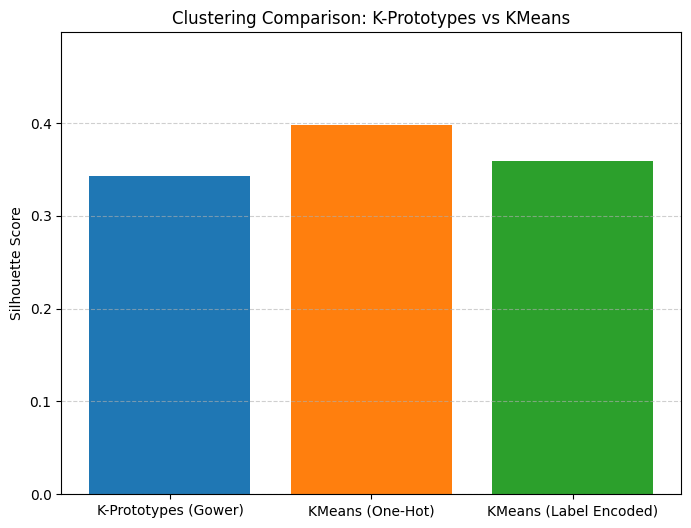

In [25]:
# --- Gower distance for mixed data ---
X_for_gower = province_df.drop(columns=['cluster'], errors='ignore').copy()
gower_dist = gower.gower_matrix(X_for_gower)

print("\n=== Clustering Comparison (with Gower for K-Prototypes) ===")
print(f"K-Prototypes (Gower)        : {study.best_value:.3f}")
print(f"KMeans (One-Hot Encoded)    : {silhouette_ohe:.3f}")
print(f"KMeans (Label Encoded)      : {silhouette_le:.3f}")

# --- Bar Chart Comparison ---
scores = {
    "K-Prototypes (Gower)": study.best_value,
    "KMeans (One-Hot)": silhouette_ohe,
    "KMeans (Label Encoded)": silhouette_le,
}

plt.figure(figsize=(8,6))
plt.bar(scores.keys(), scores.values(), color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.ylabel("Silhouette Score")
plt.title("Clustering Comparison: K-Prototypes vs KMeans")
plt.ylim(0, max(scores.values())+0.1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


DEMONSTRATING K-PROTOTYPES ADVANTAGE FOR MIXED DATA

FEATURE SPACE DIMENSIONALITY COMPARISON

           Method Original Features  Feature Space Dimensions    Dimensionality Impact
     K-Prototypes    15 num + 1 cat                        16    Native mixed handling
  K-Means (Label)    15 num + 1 cat                        16    Artificial ordinality
K-Means (One-Hot)    15 num + 1 cat                        32  Curse of dimensionality

⚠️ One-Hot Encoding increased dimensions by 100.0%


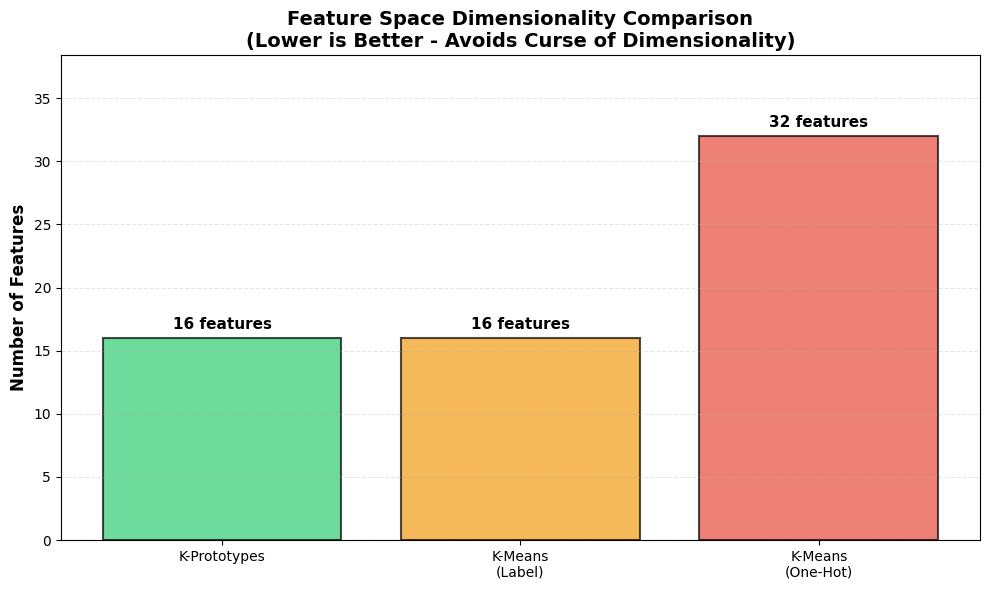


CLUSTER STABILITY ANALYSIS (Multiple Random Seeds)

Running clustering with 10 different random seeds...

Adjusted Rand Index (ARI) Statistics:
(Higher mean and lower std = More stable clustering)
           Method  Mean ARI  Std ARI  Min ARI  Max ARI
     K-Prototypes  0.901517 0.161687 0.580707      1.0
K-Means (One-Hot)  0.767896 0.154716 0.478114      1.0
  K-Means (Label)  0.929122 0.045190 0.853721      1.0


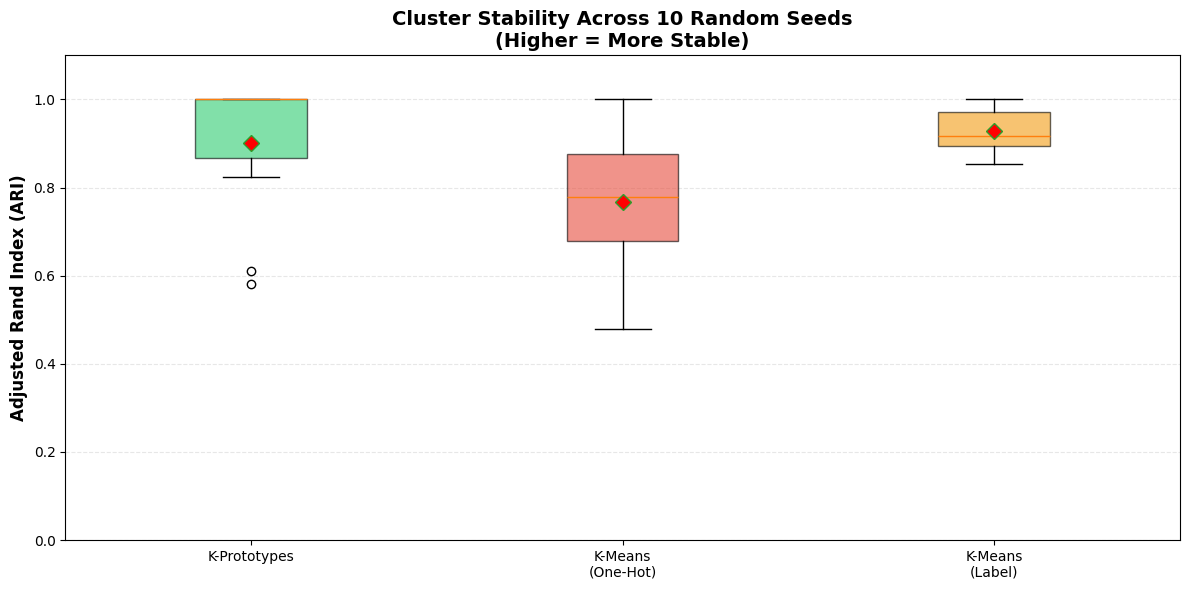

In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')

province_df_kmeans = province_df.copy()

# Separate numerical + categorical (same as in KPrototypes)
numerical_cols = province_df_kmeans.select_dtypes(include=np.number).columns.tolist()
categorical_cols = province_df_kmeans.select_dtypes(include="object").columns.tolist()

X_num = province_df_kmeans[numerical_cols].values
region = province_df_kmeans[categorical_cols].values  # assumes "Region" is in object dtype

print("="*80)
print("DEMONSTRATING K-PROTOTYPES ADVANTAGE FOR MIXED DATA")
print("="*80)

# FEATURE SPACE DIMENSIONALITY COMPARISON
print("\n" + "="*80)
print("FEATURE SPACE DIMENSIONALITY COMPARISON")
print("="*80)

# One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False, drop='first')
region_ohe = ohe.fit_transform(region)
X_ohe = np.hstack([X_num, region_ohe])

# Label Encoding
le = LabelEncoder()
region_le = le.fit_transform(region.ravel()).reshape(-1, 1)
X_le = np.hstack([X_num, region_le])

# Display dimensionality
dim_comparison = pd.DataFrame({
    'Method': ['K-Prototypes', 'K-Means (Label)', 'K-Means (One-Hot)'],
    'Original Features': [f"{len(numerical_cols)} num + {len(categorical_cols)} cat", 
                          f"{len(numerical_cols)} num + {len(categorical_cols)} cat",
                          f"{len(numerical_cols)} num + {len(categorical_cols)} cat"],
    'Feature Space Dimensions': [len(numerical_cols) + len(categorical_cols), 
                                  X_le.shape[1], 
                                  X_ohe.shape[1]],
    'Dimensionality Impact': ['Native mixed handling', 
                              ' Artificial ordinality', 
                              ' Curse of dimensionality']
})

print("\n" + dim_comparison.to_string(index=False))
print(f"\n⚠️ One-Hot Encoding increased dimensions by {((X_ohe.shape[1] / (len(numerical_cols) + len(categorical_cols))) - 1) * 100:.1f}%")

# Visualize dimensionality
fig, ax = plt.subplots(figsize=(10, 6))
methods = ['K-Prototypes', 'K-Means\n(Label)', 'K-Means\n(One-Hot)']
dimensions = [len(numerical_cols) + len(categorical_cols), X_le.shape[1], X_ohe.shape[1]]
colors = ['#2ecc71', '#f39c12', '#e74c3c']

bars = ax.bar(methods, dimensions, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Number of Features', fontsize=12, fontweight='bold')
ax.set_title('Feature Space Dimensionality Comparison\n(Lower is Better - Avoids Curse of Dimensionality)', 
             fontsize=14, fontweight='bold')
ax.set_ylim(0, max(dimensions) * 1.2)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, dim in zip(bars, dimensions):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{dim} features',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


# CLUSTER STABILITY ANALYSIS
print("\n" + "="*80)
print("CLUSTER STABILITY ANALYSIS (Multiple Random Seeds)")
print("="*80)

print("\nRunning clustering with 10 different random seeds...")

# Store results
n_runs = 10
stability_kproto = []
stability_ohe = []
stability_le = []

# Get K-Prototypes baseline clusters
baseline_kproto = final_df['cluster'].values

# Prepare data for K-Prototypes
X_kproto = province_df[numerical_cols + categorical_cols].values

for seed in range(n_runs):
    # K-Prototypes (re-run with different seed)
    kproto_temp = KPrototypes(n_clusters=3, init='Cao', random_state=seed, n_init=5, verbose=0)
    temp_labels_kproto = kproto_temp.fit_predict(X_kproto, categorical=[len(numerical_cols)])
    ari_kproto = adjusted_rand_score(baseline_kproto, temp_labels_kproto)
    stability_kproto.append(ari_kproto)
    
    # K-Means One-Hot
    kmeans_temp_ohe = KMeans(n_clusters=3, random_state=seed, n_init=10)
    temp_labels_ohe = kmeans_temp_ohe.fit_predict(X_ohe)
    ari_ohe = adjusted_rand_score(kmeans_ohe_labels, temp_labels_ohe)
    stability_ohe.append(ari_ohe)
    
    # K-Means Label
    kmeans_temp_le = KMeans(n_clusters=3, random_state=seed, n_init=10)
    temp_labels_le = kmeans_temp_le.fit_predict(X_le)
    ari_le = adjusted_rand_score(kmeans_le_labels, temp_labels_le)
    stability_le.append(ari_le)

# Calculate statistics
stability_stats = pd.DataFrame({
    'Method': ['K-Prototypes', 'K-Means (One-Hot)', 'K-Means (Label)'],
    'Mean ARI': [np.mean(stability_kproto), np.mean(stability_ohe), np.mean(stability_le)],
    'Std ARI': [np.std(stability_kproto), np.std(stability_ohe), np.std(stability_le)],
    'Min ARI': [np.min(stability_kproto), np.min(stability_ohe), np.min(stability_le)],
    'Max ARI': [np.max(stability_kproto), np.max(stability_ohe), np.max(stability_le)]
})

print("\nAdjusted Rand Index (ARI) Statistics:")
print("(Higher mean and lower std = More stable clustering)")
print(stability_stats.to_string(index=False))

# Visualize stability
fig, ax = plt.subplots(figsize=(12, 6))
positions = [1, 2, 3]
bp = ax.boxplot([stability_kproto, stability_ohe, stability_le],
                 positions=positions,
                 labels=['K-Prototypes', 'K-Means\n(One-Hot)', 'K-Means\n(Label)'],
                 patch_artist=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color boxes
colors = ['#2ecc71', '#e74c3c', '#f39c12']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_ylabel('Adjusted Rand Index (ARI)', fontsize=12, fontweight='bold')
ax.set_title('Cluster Stability Across 10 Random Seeds\n(Higher = More Stable)', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()



#### Showing the values

In [27]:
# Filter the DataFrame to show only cluster 2
cluster_2_df = final_df[final_df['cluster'] == 2]

# Display the filtered DataFrame
# display(cluster_2_df)

## Evaluation

In [28]:
# Cluster Evaluation (Silhouette, DBI, Dunn, McClain)
import gower
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from validclust import dunn

# --- Custom McClain Index ---
def mcclain_index(distance_matrix, labels):
    """
    McClain Index = (avg intra-cluster distance) / (avg inter-cluster distance)
    Lower is better.
    """
    labels = np.array(labels)
    n = len(labels)

    intra_dists = []
    inter_dists = []

    for i in range(n):
        for j in range(i + 1, n):
            if labels[i] == labels[j]:
                intra_dists.append(distance_matrix[i, j])
            else:
                inter_dists.append(distance_matrix[i, j])

    intra_mean = np.mean(intra_dists) if intra_dists else 0
    inter_mean = np.mean(inter_dists) if inter_dists else 1  # avoid div0
    return intra_mean / inter_mean

X_eval = final_df.drop(columns=["cluster"], errors="ignore")

# Convert categorical cols to string (needed for Gower)
for col in categorical_cols:
    X_eval[col] = X_eval[col].astype(str)

# Compute Gower distance (for all metrics)
print("Computing Gower distance matrix for evaluation...")
gower_dist = gower.gower_matrix(X_eval)
print("Gower distance computed!")

# Extract numeric part (for DBI only)
X_num = final_df[numerical_cols].values

results = {}

# Silhouette using Gower distance (higher = better)
results['Silhouette (Gower)'] = silhouette_score(gower_dist, final_df["cluster"], metric='precomputed')

# Davies-Bouldin Index (lower = better) - uses Euclidean on numerical features
results['Davies-Bouldin'] = davies_bouldin_score(X_num, final_df["cluster"])

# Dunn Index (higher = better)
results['Dunn'] = dunn(gower_dist, final_df["cluster"])

# McClain Index (lower = better)
results['McClain'] = mcclain_index(gower_dist, final_df["cluster"])

# --- 5. Print results ---
print("\n" + "="*50)
print("      CLUSTER EVALUATION METRICS")
print("="*50)
for metric, score in results.items():
    # Add interpretation
    if metric == 'Silhouette (Gower)':
        interpretation = "Higher is better (range: -1 to 1)"
    elif metric == 'Davies-Bouldin':
        interpretation = "Lower is better (0 to ∞)"
    elif metric == 'Dunn':
        interpretation = "Higher is better (0 to ∞)"
    elif metric == 'McClain':
        interpretation = "Lower is better (0 to ∞)"
    else:
        interpretation = ""

    print(f"{metric:.<30} {score:.4f}  ({interpretation})")
print("="*50)

Computing Gower distance matrix for evaluation...
Gower distance computed!

      CLUSTER EVALUATION METRICS
Silhouette (Gower)............ 0.3428  (Higher is better (range: -1 to 1))
Davies-Bouldin................ 4.6146  (Lower is better (0 to ∞))
Dunn.......................... 0.1268  (Higher is better (0 to ∞))
McClain....................... 0.5130  (Lower is better (0 to ∞))


In [29]:
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("K-PROTOTYPES CLUSTER VISUALIZATION")
print("(Using scaled numerical features only)")


# 1. PREPARE DATA - USE SCALED NUMERICAL FEATURES

# Extract numerical features from province_df (already scaled)
numeric_features = province_df.select_dtypes(include=np.number).columns.tolist()
if 'cluster' in numeric_features:
    numeric_features.remove('cluster')

# Use SCALED data for visualization
X_viz = province_df[numeric_features].copy()
clusters = final_df['cluster'].copy()

# Get province names from final_df index
province_names = final_df.index.tolist()

print(f"\nUsing SCALED numerical features: {len(numeric_features)}")
print(f"Samples (provinces): {len(X_viz)}")
print(f"Categorical feature (region) handled separately in K-Prototypes")

K-PROTOTYPES CLUSTER VISUALIZATION
(Using scaled numerical features only)

Using SCALED numerical features: 15
Samples (provinces): 98
Categorical feature (region) handled separately in K-Prototypes


PCA ANALYSIS ON SCALED NUMERICAL FEATURES

Explained Variance by Component:
  PC1: 0.3629 (36.29%) | Cumulative: 36.29%
  PC2: 0.2108 (21.08%) | Cumulative: 57.37%
  PC3: 0.1017 (10.17%) | Cumulative: 67.53%
  PC4: 0.0668 (6.68%) | Cumulative: 74.22%
  PC5: 0.0573 (5.73%) | Cumulative: 79.94%
  PC6: 0.0511 (5.11%) | Cumulative: 85.06%
  PC7: 0.0429 (4.29%) | Cumulative: 89.35%
  PC8: 0.0292 (2.92%) | Cumulative: 92.27%
  PC9: 0.0238 (2.38%) | Cumulative: 94.65%
  PC10: 0.0207 (2.07%) | Cumulative: 96.72%

Components needed for 90% variance: 8
Components needed for 95% variance: 10


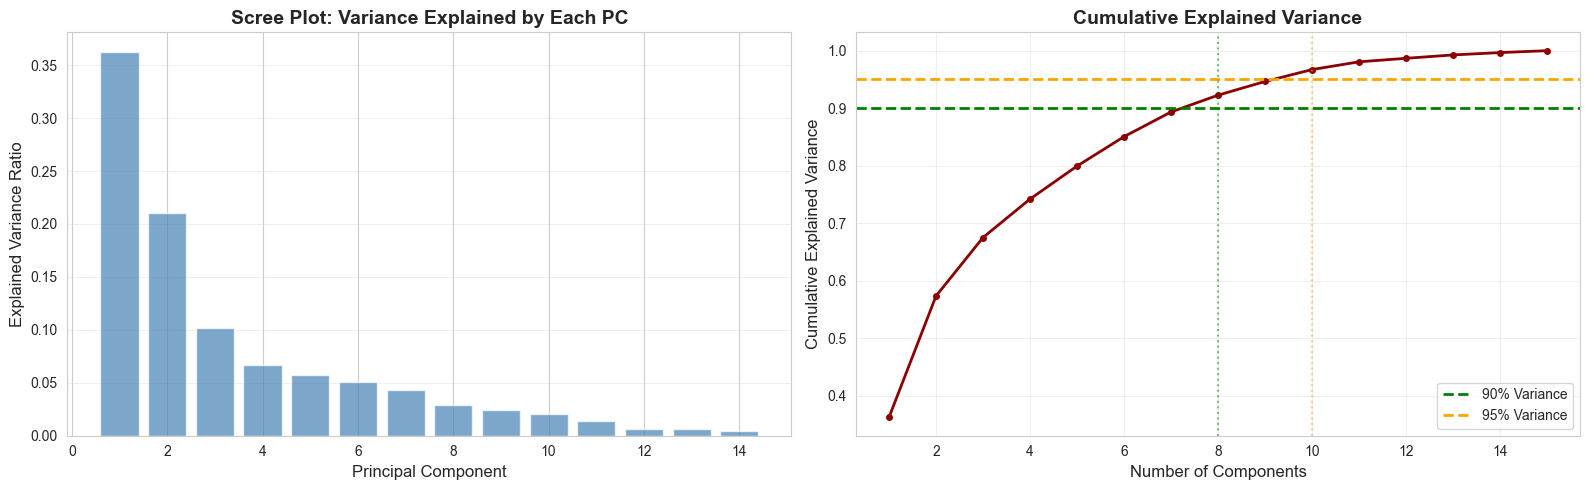

In [30]:
# PCA ANALYSIS WITH EXPLAINED VARIANCE
from sklearn.decomposition import PCA

print("PCA ANALYSIS ON SCALED NUMERICAL FEATURES")

# Perform PCA on scaled data
pca = PCA()

X_pca = pca.fit_transform(X_viz)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nExplained Variance by Component:")
for i, var in enumerate(pca.explained_variance_ratio_[:10], 1):
    cum_var = cumulative_variance[i-1]
    print(f"  PC{i}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum_var*100:.2f}%")

print(f"\nComponents needed for 90% variance: {n_components_90}")
print(f"Components needed for 95% variance: {n_components_95}")

# Visualization 1: Scree Plot & Cumulative Variance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scree plot
axes[0].bar(range(1, min(15, len(pca.explained_variance_ratio_)+1)),
            pca.explained_variance_ratio_[:14],
            alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot: Variance Explained by Each PC', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance)+1),
             cumulative_variance,
             marker='o', linewidth=2, color='darkred', markersize=4)
axes[1].axhline(y=0.90, color='green', linestyle='--', label='90% Variance', linewidth=2)
axes[1].axhline(y=0.95, color='orange', linestyle='--', label='95% Variance', linewidth=2)
axes[1].axvline(x=n_components_90, color='green', linestyle=':', alpha=0.5)
axes[1].axvline(x=n_components_95, color='orange', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 3D PCA VISUALIZATION (Interactive)
print("3D PCA VISUALIZATION")

# Create PCA dataframe with first 3 components
pca_df = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Add cluster and province information
pca_df['cluster'] = clusters.values
pca_df['province'] = province_names

# Define cluster labels and colors (if not already defined)


cluster_colors = {
    0: '#3498db',  # Blue
    1: '#e74c3c',  # Red
    2: '#2ecc71'   # Green
}

# Add cluster labels for hover
pca_df['cluster_label'] = pca_df['cluster'].map(cluster_labels)

# Create interactive 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='cluster',
    hover_name='province',
    hover_data={'cluster_label': True, 'cluster': False},
    color_discrete_map=cluster_colors,
    title=f'3D PCA: K-Prototypes Clusters (Explains {cumulative_variance[2]*100:.1f}% variance)',
    labels={
        'PC1': f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)',
        'PC2': f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)',
        'PC3': f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)',
        'cluster': 'Cluster ID'
    }
)
fig.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(height=700)
fig.show()

3D PCA VISUALIZATION


t-SNE VISUALIZATION (Non-linear dimensionality reduction)


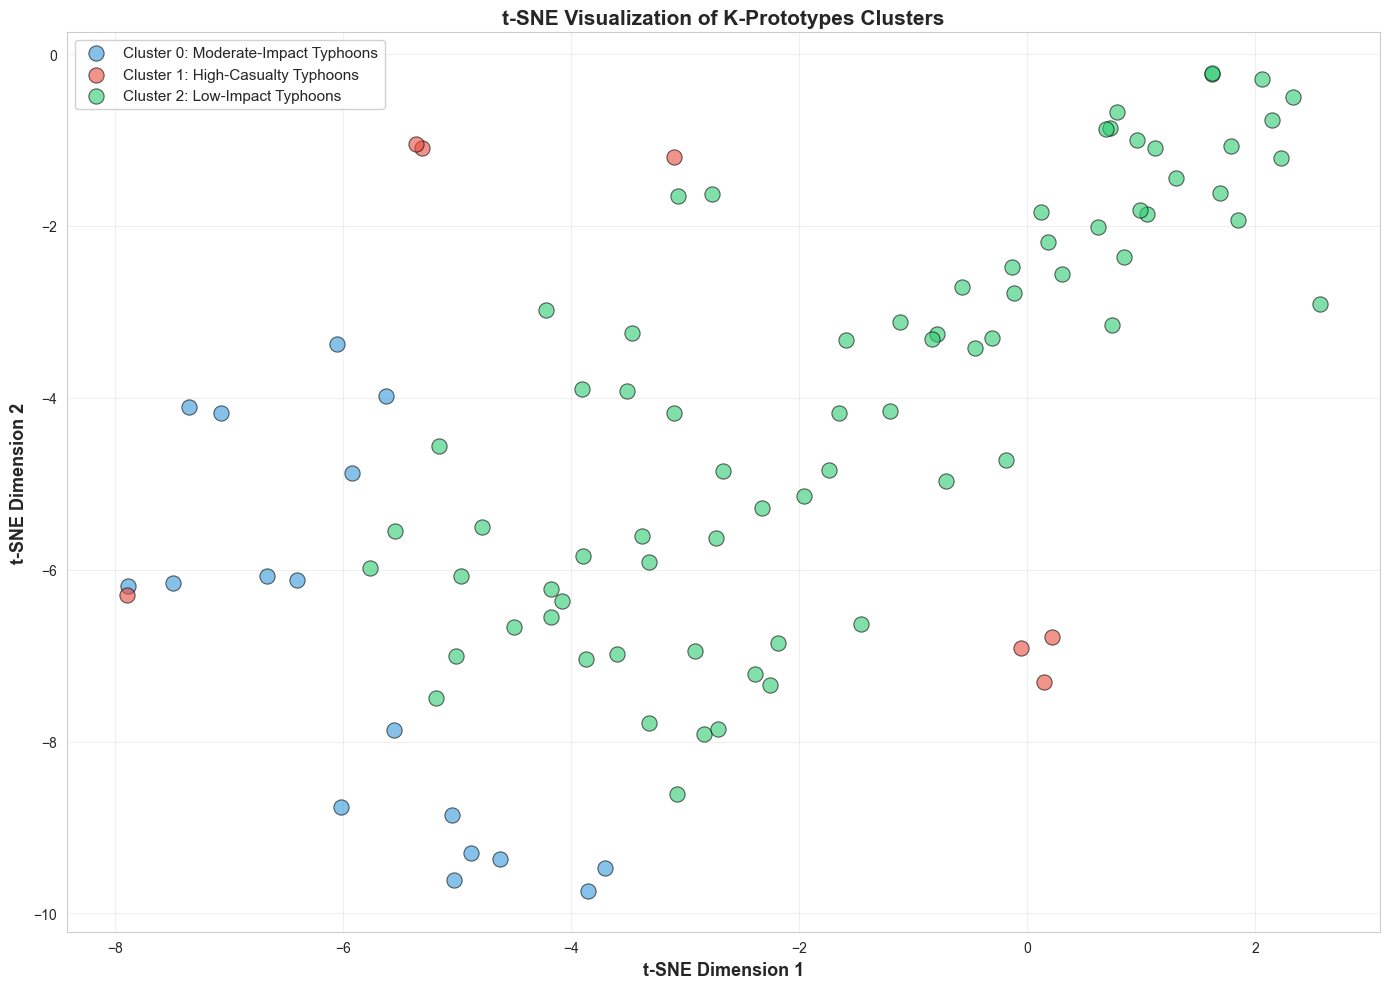

In [32]:
# t-SNE VISUALIZATION

print("t-SNE VISUALIZATION (Non-linear dimensionality reduction)")

perplexity_val = min(30, len(X_viz) - 1)
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val, n_iter=1000)
X_tsne = tsne.fit_transform(X_viz)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = clusters.values
tsne_df['province'] = province_names

fig, ax = plt.subplots(figsize=(14, 10))

for cluster_id in sorted(tsne_df['cluster'].unique()):
    cluster_data = tsne_df[tsne_df['cluster'] == cluster_id]
    ax.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'],
               c=cluster_colors.get(cluster_id, 'gray'),
               label=f'Cluster {cluster_id}: {cluster_labels.get(cluster_id, "Unknown")}',
               alpha=0.6,
               s=120,
               edgecolors='black',
               linewidth=0.8)

ax.set_xlabel('t-SNE Dimension 1', fontsize=13, fontweight='bold')
ax.set_ylabel('t-SNE Dimension 2', fontsize=13, fontweight='bold')
ax.set_title('t-SNE Visualization of K-Prototypes Clusters', fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### MAACLI Framework

In [33]:
final_df.head()

,region_,person_sum,dead_sum,injured_ill_sum,missing_sum,totally_sum,partially_sum,cost_sum,has_food_sum,has_cash_sum,has_hygiene_health_sum,has_sleeping_essentials_sum,has_shelter_support_sum,num_typhoons,recurrence_rate,cost_per_family,cluster
0,CAR,665436.0,2.0,115.0,0.0,58.0,888.0,29463089.14,61,46,8,4,4,29,5.80,154.257011,0
1,13,1651.0,0.0,0.0,0.0,4.0,6.0,280324.00,0,0,0,0,0,2,2.00,737.694737,2
2,CARAGA,187974.0,0.0,0.0,0.0,2872.0,9370.0,20049094.82,1,0,0,0,0,7,1.40,448.877081,2
3,CARAGA,221391.0,0.0,0.0,0.0,167.0,707.0,6707484.86,3,0,0,0,0,5,1.25,120.374087,2
4,6,637351.0,8.0,2.0,1.0,273.0,9530.0,66326300.00,51,35,1,3,0,22,4.40,388.050105,2


In [34]:
final_df.columns = final_df.columns.str.strip()  # remove whitespace
final_df['region_'] = final_df['region_'].astype(str)  # categorical as string

# Only keep region as categorical (province_ is an ID, not useful for learning)
categorical_cols = ['region_']
numeric_cols = [col for col in final_df.columns if col not in categorical_cols + ['province_region', 'cluster']]

# Encode categorical for ML
df_encoded = final_df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

X = df_encoded[numeric_cols + categorical_cols]
y = df_encoded["cluster"]

# Train XGBoost
xgb = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=200, random_state=42)
xgb.fit(X, y)

# Feature importance
print("Feature Importances:", xgb.feature_importances_)


perm_importance = permutation_importance(
    xgb, X, y,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Show top features per cluster (simplified)
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

print("\n=== GLOBAL FEATURE IMPORTANCE ===")
print(importance_df)


Feature Importances: [0.03077436 0.20674315 0.01722845 0.05215483 0.02133447 0.04107969
 0.1477156  0.15703166 0.03992622 0.01709788 0.04712323 0.0764931
 0.03435111 0.08493517 0.01445066 0.01156052]

=== GLOBAL FEATURE IMPORTANCE ===
                        feature  importance
6                      cost_sum    0.074490
7                  has_food_sum    0.070408
1                      dead_sum    0.068367
12                 num_typhoons    0.009184
0                    person_sum    0.007143
3                   missing_sum    0.000000
5                 partially_sum    0.000000
2               injured_ill_sum    0.000000
4                   totally_sum    0.000000
8                  has_cash_sum    0.000000
10  has_sleeping_essentials_sum    0.000000
9        has_hygiene_health_sum    0.000000
11      has_shelter_support_sum    0.000000
13              recurrence_rate    0.000000
14              cost_per_family    0.000000
15                      region_    0.000000


In [35]:
# Prepare data for tree (encode categorical)
df_explain = final_df.copy()
df_explain['region_'] = df_explain['region_'].astype('category').cat.codes  # encode

# Features + target
X_tree = df_explain.drop(columns=['province_', 'cluster'], errors='ignore')
y_tree = df_explain['cluster']

# Train a shallow decision tree (for interpretability)
tree = DecisionTreeClassifier(
    max_depth=4,          # keep it simple
    min_samples_leaf=5,   # avoid overfitting
    random_state=42
)
tree.fit(X_tree, y_tree)

# Extract rules per cluster
rules = export_text(tree, feature_names=list(X_tree.columns))
print("=== DECISION TREE RULES ===")
print(rules)

=== DECISION TREE RULES ===
|--- cost_sum <= 127412856.00
|   |--- dead_sum <= 21.50
|   |   |--- has_food_sum <= 45.50
|   |   |   |--- recurrence_rate <= 4.58
|   |   |   |   |--- class: 2
|   |   |   |--- recurrence_rate >  4.58
|   |   |   |   |--- class: 2
|   |   |--- has_food_sum >  45.50
|   |   |   |--- class: 0
|   |--- dead_sum >  21.50
|   |   |--- class: 1
|--- cost_sum >  127412856.00
|   |--- injured_ill_sum <= 12.00
|   |   |--- class: 0
|   |--- injured_ill_sum >  12.00
|   |   |--- class: 1



In [36]:
# Features you always want to add to descriptions
extra_features = [
    'has_hygiene_health_sum',
    'has_sleeping_essentials_sum',
    'has_shelter_support_sum',
    'recurrence_rate'
]

# Predefined cluster interpretations
cluster_labels = {
    0: "Moderate-Impact Typhoons Cyclones",
    1: "High-Casualty Typhoons Cyclones",
    2: "Low-Impact Typhoons Cyclones"
}

def describe_cluster(df, cluster_id, important_features, top_k=3):
    subset = df[df['cluster'] == cluster_id]

    # Add cluster title and interpretation label
    desc = f"**Cluster {cluster_id} – {cluster_labels.get(cluster_id, 'Unlabeled')}**\n"

    # Core features = top_k important + extras (unique)
    features_to_describe = list(dict.fromkeys(important_features[:top_k] + extra_features))

    # Add feature-based description
    for feat in features_to_describe:
        if feat in df.columns:  # only describe if exists in data
            if df[feat].dtype in ['object', 'category']:
                mode_val = subset[feat].mode().iloc[0] if not subset[feat].mode().empty else "N/A"
                desc += f"- {feat}: mostly '{mode_val}'\n"
            else:
                q1 = subset[feat].quantile(0.25)
                q3 = subset[feat].quantile(0.75)
                desc += f"- {feat}: 75% between {q1:,.0f} and {q3:,.0f}\n"

    return desc

top_features = [
    f for f in importance_df['feature'].tolist()
    
]

# Print descriptions
for cluster_id in sorted(final_df['cluster'].unique()):
    print(describe_cluster(final_df, cluster_id, top_features, top_k=3))


**Cluster 0 – Moderate-Impact Typhoons Cyclones**
- cost_sum: 75% between 87,559,243 and 206,898,335
- has_food_sum: 75% between 38 and 80
- dead_sum: 75% between 2 and 16
- has_hygiene_health_sum: 75% between 6 and 15
- has_sleeping_essentials_sum: 75% between 5 and 19
- has_shelter_support_sum: 75% between 0 and 8
- recurrence_rate: 75% between 4 and 5

**Cluster 1 – High-Casualty Typhoons Cyclones**
- cost_sum: 75% between 65,528,087 and 192,338,148
- has_food_sum: 75% between 23 and 56
- dead_sum: 75% between 56 and 78
- has_hygiene_health_sum: 75% between 0 and 8
- has_sleeping_essentials_sum: 75% between 0 and 6
- has_shelter_support_sum: 75% between 0 and 3
- recurrence_rate: 75% between 2 and 3

**Cluster 2 – Low-Impact Typhoons Cyclones**
- cost_sum: 75% between 314,880 and 38,721,840
- has_food_sum: 75% between 1 and 19
- dead_sum: 75% between 0 and 3
- has_hygiene_health_sum: 75% between 0 and 2
- has_sleeping_essentials_sum: 75% between 0 and 1
- has_shelter_support_sum: 75

In [37]:
final_df.columns

Index(['region_', 'person_sum', 'dead_sum', 'injured_ill_sum', 'missing_sum',
       'totally_sum', 'partially_sum', 'cost_sum', 'has_food_sum',
       'has_cash_sum', 'has_hygiene_health_sum', 'has_sleeping_essentials_sum',
       'has_shelter_support_sum', 'num_typhoons', 'recurrence_rate',
       'cost_per_family', 'cluster'],
      dtype='object')

**Cluster 0**

This cluster represents Typhoons Cyclones with moderate disaster costs, moderate food and relief distribution, and intermediate mortality levels. Affected provinces typically receive sustained support in hygiene, sleeping essentials, and shelter assistance, indicating significant but manageable relief operations. The recurrence rate of 4–5 events per year suggests these provinces are consistently exposed, requiring repeated preparedness and recovery cycles.

**Cluster 1** 

This cluster is defined primarily by elevated death counts, despite moderate costs and limited relief distribution (food, hygiene, sleeping, shelter). The relatively low recurrence rate (2–3 events/year) suggests that although provinces here experience fewer Typhoons Cyclones, when disasters occur, they tend to be extremely lethal. This highlights cases of extreme vulnerability, insufficient preparedness, or unusually severe Typhoons Cyclones that overwhelm existing response capacity.

**Cluster 2**

This cluster contains Typhoons Cyclones with minimal economic costs, negligible mortality, and limited relief needs (very low hygiene, shelter, and sleeping support). The recurrence rate (2–4 events/year) indicates that these provinces are regularly affected, but the impacts remain low in severity, possibly due to weaker storm intensities or effective local mitigation and adaptation measures.